In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print("訓練資料量:",len(x_train)) #查看訓練資料數
print("測試資料量:",len(x_test))  #查看測試資料數

訓練資料量: 60000
測試資料量: 10000


In [5]:
x_train[555].shape

(28, 28)

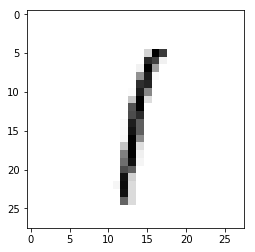

In [6]:
plt.imshow(x_train[52888],cmap='Greys') #秀出52888編號的圖看看

In [7]:
new_x_train = x_train.reshape(60000, 28, 28, 1)
new_x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
new_x_train[555].shape

(28, 28, 1)

In [9]:
new_y_train = np_utils.to_categorical(y_train, 10)
new_y_test = np_utils.to_categorical(y_test, 10)

In [10]:
new_y_train[52888]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
new_x_train = new_x_train/255
new_x_test = new_x_test/255

In [12]:
#匯入模型所需套件
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import Adam

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(3,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(6,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(9,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 3)         30        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 6)         168       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 6)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 9)           495       
__________

In [16]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [17]:
model_his = model.fit(new_x_train,new_y_train,batch_size=100,epochs=5,verbose = 1,validation_data = (new_x_test,new_y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 118s - loss: 0.3587 - acc: 0.8852 - val_loss: 0.1251 - val_acc: 0.9616
Epoch 2/5
60000/60000 [==============================] - 113s - loss: 0.1283 - acc: 0.9605 - val_loss: 0.0955 - val_acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 112s - loss: 0.0983 - acc: 0.9692 - val_loss: 0.0677 - val_acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 114s - loss: 0.0859 - acc: 0.9735 - val_loss: 0.0821 - val_acc: 0.9738
Epoch 5/5
60000/60000 [==============================] - 114s - loss: 0.0783 - acc: 0.9753 - val_loss: 0.0744 - val_acc: 0.9755


In [18]:
from ipywidgets import interact_manual

In [19]:
predict = model.predict_classes(new_x_test)

10000/10000 [==============================] - 12s    


In [20]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為:',predict[測試編號])
interact_manual(test,測試編號 = (0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

In [23]:
score = model.evaluate(new_x_test, new_y_test)
print('\n-----------結果如下-----------')
print(f'loss:{score[0]}')
print(f'正確率:{score[1]}')

 9984/10000 [============================>.] - ETA: 0s
-----------結果如下-----------
loss:0.07438469515107572
正確率:0.9755


<function matplotlib.pyplot.show(*args, **kw)>

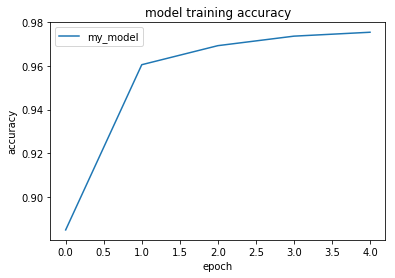

In [24]:
plt.plot(model_his.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["my_model"],loc = "best")
plt.show